In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_extra_spaces(df, col)
# be as soon as possible
# '''

# features + tfidf(ngram=(1,2)) + rating + tense + scaled(length) + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_extra_spaces(df, col)\n# be as soon as possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_train.shape

(1092, 305)

========================= DecisionTree =========================
Elapsed Time: 157.1081 seconds
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
Train Accuracy: 0.5925, F1: [0.6042 0.4353 0.6376 0.6736]
Test  Accuracy: 0.5699, F1: [0.6508 0.3659 0.5926 0.6186]


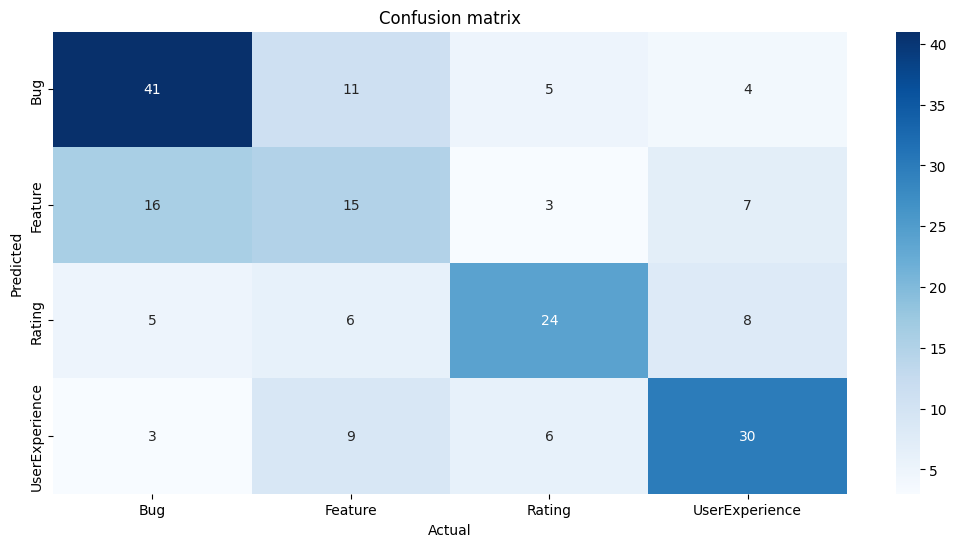

========================= LSVM =========================
Elapsed Time: 132.191 seconds
LinearSVC(C=0.1, dual=False)
Train Accuracy: 0.7491, F1: [0.7762 0.622  0.7561 0.7906]
Test  Accuracy: 0.6632, F1: [0.7481 0.5    0.6136 0.7071]


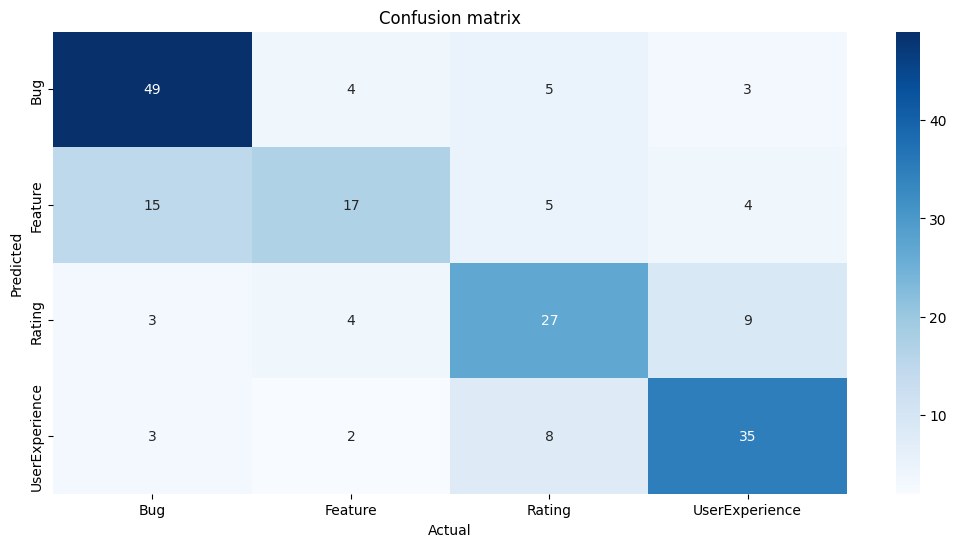

========================= RandomForest =========================
Elapsed Time: 230.9635 seconds
RandomForestClassifier(criterion='entropy', max_depth=28, min_samples_split=11,
                       n_estimators=500)
Train Accuracy: 0.9835, F1: [0.9932 0.9934 0.9744 0.9746]
Test  Accuracy: 0.6166, F1: [0.6901 0.386  0.5647 0.6863]


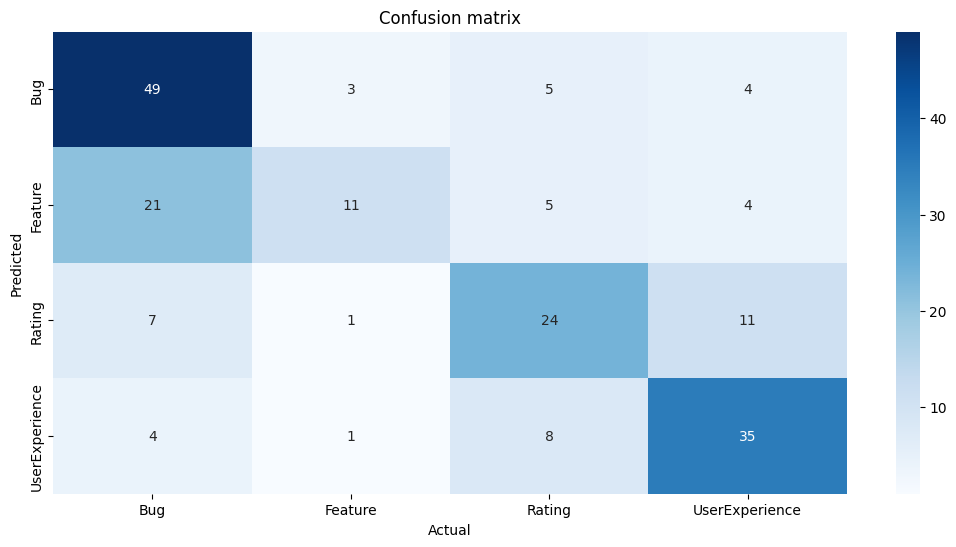

========================= AdaBoost =========================
Elapsed Time: 23.1735 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=100, dual=False),
                   learning_rate=0.01)
Train Accuracy: 0.7811, F1: [0.7954 0.7246 0.7818 0.8046]
Test  Accuracy: 0.6684, F1: [0.7559 0.5352 0.6    0.7143]


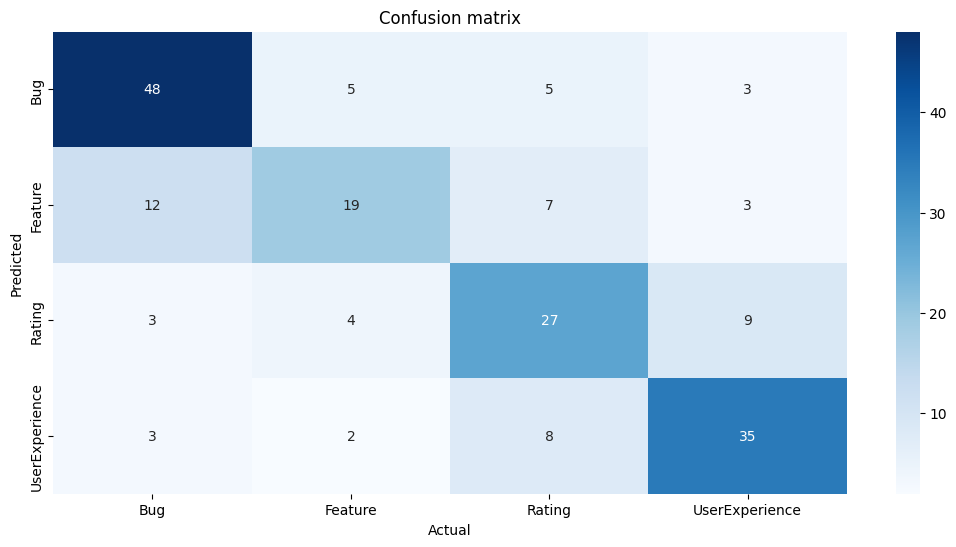

========================= XGBoost =========================
Elapsed Time: 389.0129 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9401708440155795, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.44753000923635167, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05983787634624296, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=139, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.8434, F1: [0.8769 0.8442 0.8074 0.8421]
Test  Accuracy: 0.6684, F1: [0.7438 0.5867 0.5814 0.7115]


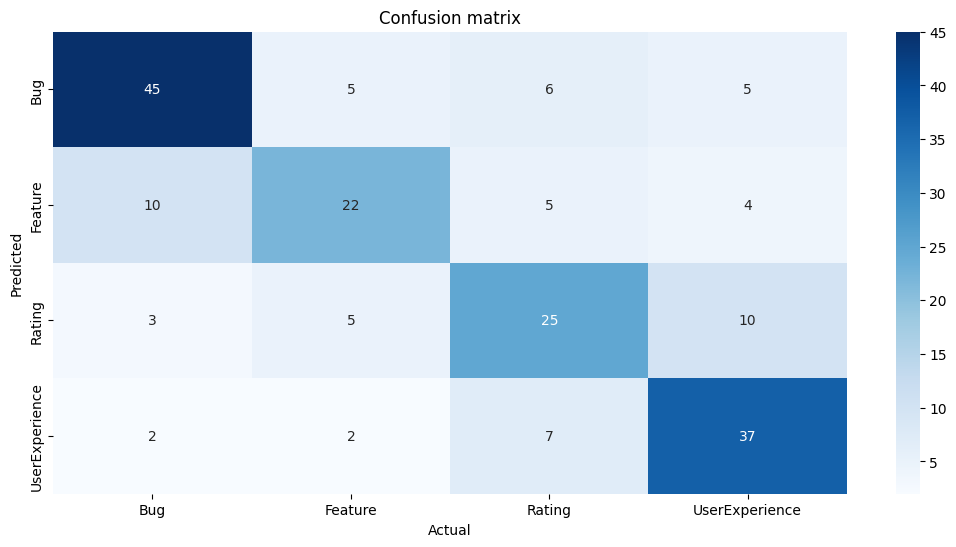

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)